# Lets do some modeling!

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import itertools
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
import sklearn.datasets as datasets
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [104]:
df = pd.read_csv('most_cleaned_data.csv', index_col=0)

In [105]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'SALE_SEASON', 'zip_mean', 'above_mean', 'year'],
      dtype='object')

In [106]:
df.drop(['BOROUGH','NEIGHBORHOOD','BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'YEAR_BUILT', 
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'zip_mean'], axis=1, inplace=True)

In [107]:
print('Target Variable')
print(df.groupby(['above_mean']).above_mean.count())

Target Variable
above_mean
0    11163
1     4267
Name: above_mean, dtype: int64


In [108]:
df = pd.get_dummies(df, columns=['SALE_SEASON','ZIP_CODE', 'APARTMENT_NUMBER', 'TAX_CLASS_AT_TIME_OF_SALE', 'year'], drop_first=True)

In [109]:
df.sample(20)

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,above_mean,SALE_SEASON_2,SALE_SEASON_3,SALE_SEASON_4,ZIP_CODE_11203,ZIP_CODE_11204,ZIP_CODE_11205,ZIP_CODE_11206,...,APARTMENT_NUMBER_3,TAX_CLASS_AT_TIME_OF_SALE_2,TAX_CLASS_AT_TIME_OF_SALE_3,TAX_CLASS_AT_TIME_OF_SALE_4,"year_(1901.0, 1920.0]","year_(1921.0, 1940.0]","year_(1941.0, 1960.0]","year_(1961.0, 1980.0]","year_(1981.0, 2000.0]","year_(2001.0, 2016.0]"
4544,6010,4980,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23086,2003,2928,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9103,2288,4876,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5229,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
22582,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
16967,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12241,1600,2000,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8785,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
18408,4000,2236,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3846,3468,2920,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [110]:
# categorical:'year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER', 'TAX_CLASS_AT_TIME_OF_SALE'
# continuous: 
outcome = ['above_mean']
predictors = ['year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET','TAX_CLASS_AT_TIME_OF_SALE']

In [111]:
# Create matrix of features
X = df.drop('above_mean', axis = 1) # grabs everything else but target

# Create target variable
y = df['above_mean'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [112]:
feature_cols

Index(['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_SEASON_2',
       'SALE_SEASON_3', 'SALE_SEASON_4', 'ZIP_CODE_11203', 'ZIP_CODE_11204',
       'ZIP_CODE_11205', 'ZIP_CODE_11206', 'ZIP_CODE_11207', 'ZIP_CODE_11208',
       'ZIP_CODE_11209', 'ZIP_CODE_11210', 'ZIP_CODE_11211', 'ZIP_CODE_11212',
       'ZIP_CODE_11213', 'ZIP_CODE_11214', 'ZIP_CODE_11215', 'ZIP_CODE_11216',
       'ZIP_CODE_11217', 'ZIP_CODE_11218', 'ZIP_CODE_11219', 'ZIP_CODE_11220',
       'ZIP_CODE_11221', 'ZIP_CODE_11222', 'ZIP_CODE_11223', 'ZIP_CODE_11224',
       'ZIP_CODE_11225', 'ZIP_CODE_11226', 'ZIP_CODE_11227', 'ZIP_CODE_11228',
       'ZIP_CODE_11229', 'ZIP_CODE_11230', 'ZIP_CODE_11231', 'ZIP_CODE_11232',
       'ZIP_CODE_11233', 'ZIP_CODE_11234', 'ZIP_CODE_11235', 'ZIP_CODE_11236',
       'ZIP_CODE_11237', 'ZIP_CODE_11238', 'ZIP_CODE_11239', 'ZIP_CODE_11249',
       'APARTMENT_NUMBER_1', 'APARTMENT_NUMBER_3',
       'TAX_CLASS_AT_TIME_OF_SALE_2', 'TAX_CLASS_AT_TIME_OF_SALE_3',
       'TAX_CLASS_AT_TIME_O

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'LAND_SQUARE_FEET': 0.0002665316959834184,
 'GROSS_SQUARE_FEET': 0.0003770251501149552,
 'SALE_SEASON_2': -0.25469564439228276,
 'SALE_SEASON_3': -0.192539251306281,
 'SALE_SEASON_4': -0.04647127908888864,
 'ZIP_CODE_11203': -0.38446469406446604,
 'ZIP_CODE_11204': 0.09857043260109435,
 'ZIP_CODE_11205': -0.03289360630563412,
 'ZIP_CODE_11206': -0.3305908152569257,
 'ZIP_CODE_11207': -0.22338620169061305,
 'ZIP_CODE_11208': -0.4733317680479047,
 'ZIP_CODE_11209': 0.5197032023410855,
 'ZIP_CODE_11210': -0.29027982309326683,
 'ZIP_CODE_11211': -0.1441601178898754,
 'ZIP_CODE_11212': -0.452515777403462,
 'ZIP_CODE_11213': -0.334905371836628,
 'ZIP_CODE_11214': 0.1651071267934774,
 'ZIP_CODE_11215': 0.20879959675611262,
 'ZIP_CODE_11216': 0.009165637170308783,
 'ZIP_CODE_11217': 0.04079290439820198,
 'ZIP_CODE_11218': -0.01460181752825704,
 'ZIP_CODE_11219': 0.16492286767317624,
 'ZIP_CODE_11220': -0.04634128878571651,
 'ZIP_CODE_11221': 0.2620343074958611,
 'ZIP_CODE_11222': -0.072347333

In [35]:
y_pred = logreg.predict(X_test)

The simplest metric we can use to evaluate our model is accuracy.

**Classification Accuracy:** Overall, how often is the classifier correct?

In [37]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7974724562540505


In [39]:
#check null accuracy - how often would it be right if it always guessed yes
max(y_test.mean(), 1 - y_test.mean())

0.7333117303953338

### Ok, so that's not great

In [38]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2172   91]
 [ 534  289]]


In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
classes = ['Below Average', 'Above Average']

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[2172   91]
 [ 534  289]]


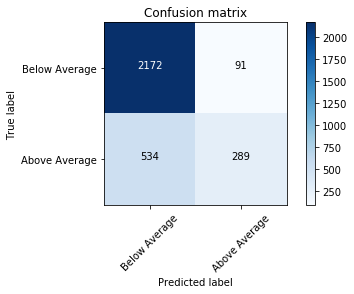

In [54]:
# positive = above average
# negative = below average
plot_confusion_matrix(cm, classes)

## Precision
When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [48]:
# check the precision
print(metrics.precision_score(y_test, y_pred))

0.7605263157894737


## Recall (Sensitivity)

What proportion of actual positives was identified correctly?

In [49]:
print(metrics.recall_score(y_test, y_pred))

0.3511543134872418


## F1 score 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [51]:
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

0.48046550290939327

In [146]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred))

0.7473592880706044


In [147]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.7285053465196517

# I need to 'SMOTE' my classes (too uneven)

ONLY SMOTE THE TRAINING

In [114]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)
clf_smote = LinearSVC().fit(X_sm, y_sm)
# plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [64]:
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=1)

In [115]:
logreg = LogisticRegression()
logreg.fit(X_sm_train, y_sm_train)
y_pred = logreg.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7485418016850292


In [117]:
#check null accuracy - how often would it be right if it always guessed yes
max(y_test.mean(), 1 - y_test.mean())

0.710952689565781

Confusion Matrix, without normalization
[[1601  676]
 [ 316 1873]]


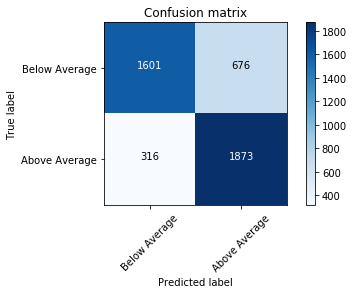

In [70]:
# print(metrics.confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
classes = ['Below Average', 'Above Average']
plot_confusion_matrix(cm, classes)

In [72]:
print('F1 Score:')
2*(metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred))/(metrics.precision_score(y_test, y_pred)+metrics.recall_score(y_test, y_pred))

F1 Score:


0.7906289573659772

## Ok, KNN now?

In [126]:
knn = KNeighborsClassifier(n_neighbors=10)

In [127]:
knn.fit(X_sm_train, y_sm_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [128]:
y_pred = knn.predict(X_test)

In [129]:
f1_score(y_test, y_pred, average='weighted')

0.7694681837190069

In [133]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_sm_train, y_sm_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append(score)
print(k_scores)

[0.750720453288636, 0.7400903390920649, 0.7540001647332495, 0.7536253673664427, 0.7541086462756146, 0.7617846990510474, 0.7597869057760155, 0.7595600210061637, 0.7645862322256255, 0.7694681837190069, 0.7591247850059873, 0.764225183048755, 0.7581489040412334, 0.761898546835911, 0.756211866873288, 0.760734815435585, 0.756590429835027, 0.7562373767886362, 0.7536140133537678]


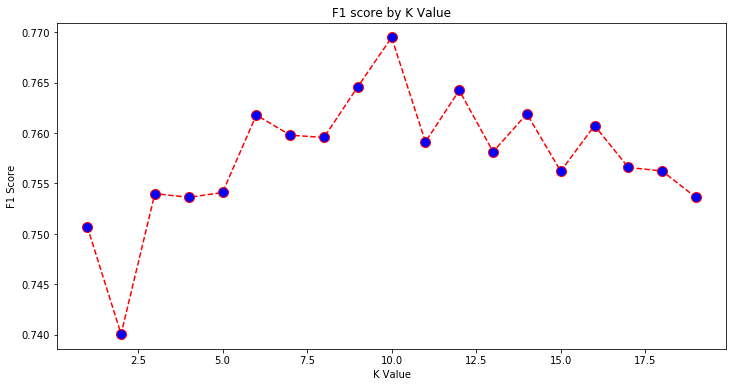

In [134]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

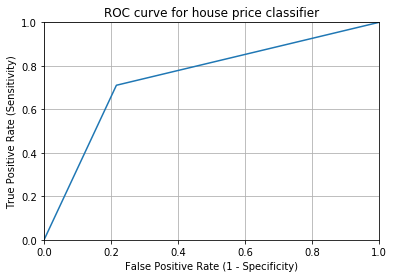

In [135]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for house price classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Decision Tree Time!

In [141]:
ctree=DecisionTreeClassifier(max_depth = 2)
ctree.fit(X_sm_train, y_sm_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

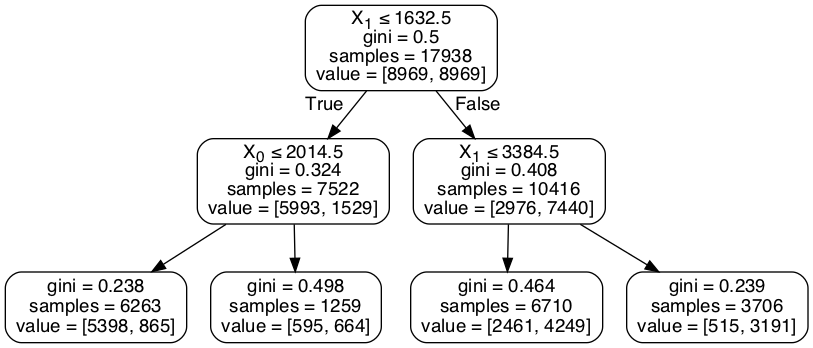

In [142]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [143]:
classPred = ctree.predict(X_test)

In [144]:
accuracy_score(y_test, classPred)

0.6924821775761504

[0.7528931285897801, 0.7555453337464464, 0.7474493961815286, 0.7541815348285322, 0.7493922730980174, 0.7390315116443869, 0.7347566125205603, 0.7354071372573225, 0.7282819878434618]


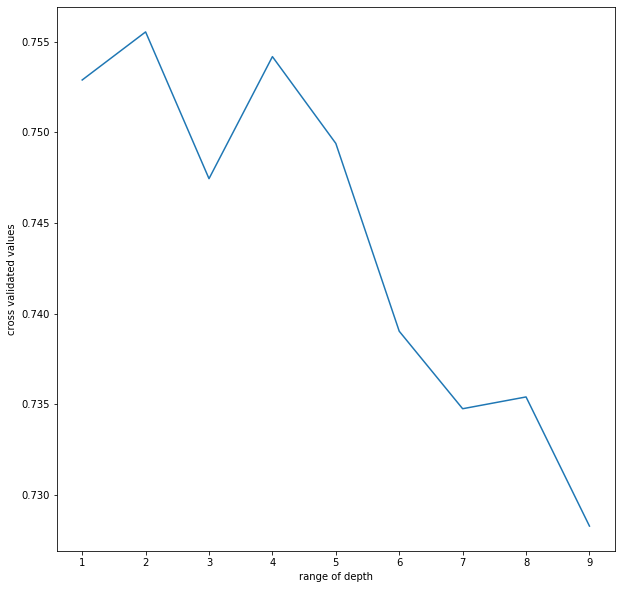

In [140]:
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

Plot the validation curve?

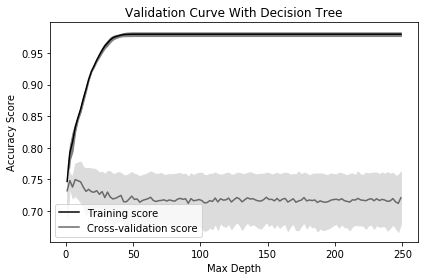

In [145]:
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), 
                                             X, 
                                             y, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Hmmm

# Random Forest - go vote!

To construct a Random Forest estimator, what we need is:
Bootstrap the entire dataset
Build a tree using only a random subset of the features at each node from bootstrapped dataset
Repeat step 1 and 2 many, many, many times, and aggregate all the trees
Output prediction through each tree
- For classification, take the majority predicted value


**use gridsearch to tune hyperparamaters!**

In [149]:
ctree.feature_importances_

array([0.1116124, 0.8883876, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ])

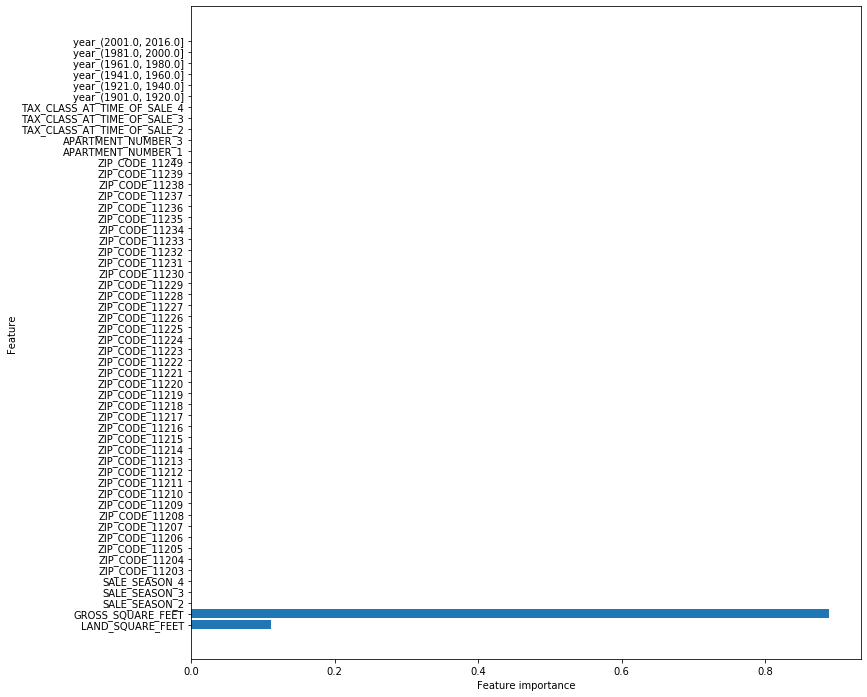

In [152]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(ctree)